Clasificación Binaria

Este modelo está inspirado en el funcionamiento de las neuronas biológicas que forman las redes neuronales de nuestros cerebros, recibiendo una serie de señales de entrada y devolviendo un resultado a la salida, calculando una suma ponderada de todos los inputs y aplicando una función de activación.

También vimos cómo aplicar este sencillo algoritmo para la tarea de regresión lineal, en la que el objetivo es dar un valor numérico real a partir de una serie de características de entrada. Aprendimos que podemos encontrar los pesos undefined de nuestro modelo utilizando el algoritmo de optimización conocido como descenso por gradiente en el que minimizamos una función de pérdida. En este post vamos a ver una nueva aplicación del Perceptrón: clasificación binaria. En esta tarea nuestro objetivo es dar como resultado si una muestra pertenece a una clase en particular o no a partir de sus características.

Para el problema de regresión lineal usamos el ejemplo de predicción de precios de inmuebles a partir de características como el número de habitaciones o los metros cuadrados. En el caso de clasificación binaria podemos pensar en un sistema de ayuda al diagnóstico médico en el que nuestro modelo tiene que decirnos si un paciente tiene una enfermedad o no a partir de valores como su edad, peso, temperatura, síntomas, etc.

Función de Activación
Para el problema de regresión lineal vimos que tenemos que utilizar una función de activación lineal, de manera que nuestro modelo sea capaz de dar como resultado cualquier valor real entre undefined y undefined. En el caso de la clasificación binaria queremos que nuestro modelo sólo nos de dos valores: undefined ó undefined. Para ello utilizamos la función de activación step.

dónde la función step da como resultado undefined si undefined o bien undefined en el caso contrario.

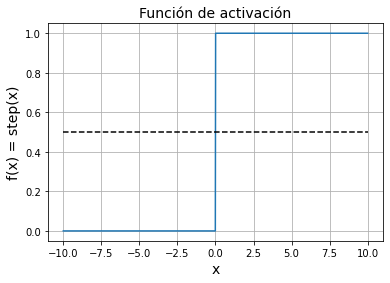

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)
y = x > 0

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = step(x)', fontsize=14)
plt.title('Función de activación', fontsize=14)
plt.plot(x, np.full(len(x), 0.5), '--k')
plt.show()

El Dataset

Vamos ahora a ver cómo entrenar nuestro Preceptrón para clasificación binaria. Para ello, primero necesitamos un conjunto de datos formado por un número determinado de elementos con varias características acompañados de sus correspondiente clase (o etiqueta). En este post vamos a utilizar un dataset muy utilizado en el ámbito académico muy útil para aprender a desarrollar modelos de clasificación: El dataset Iris. Este dataset contiene ejemplos de flores que tendremos que clasificar en 3 grupos diferentes a partir del ancho y longitud de sus pétalos y sépalos (en total 4 características). Este dataset está disponible a través de la librería Scikit Learn, sobre la que hablaremos más adelante.

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = iris.target

X.shape, y.shape

((150, 2), (150,))

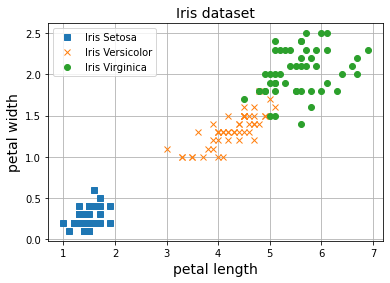

In [4]:
plt.plot(X[y==0, 0], X[y==0, 1], 's', label="Iris Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], 'x', label="Iris Versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], 'o', label="Iris Virginica")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

Para poder llevar a cabo visualizaciones ilustrativas, vamos a trabajar sólo con dos de las cuatro características: la longitud y ancho del pétalo. Cómo puedes observar, el dataset está compuesto por 150 flores. Cada flor tiene su correspondiente etiqueta, y hay 3 clases en total. En este ejemplo, al querer llevar a cabo una tarea de clasificación binaria, vamos a juntar dos de las clases para trabajar con solo una de ellas.

C:\Users\Killer\AppData\Local\Temp\ipykernel_29288\3811289011.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


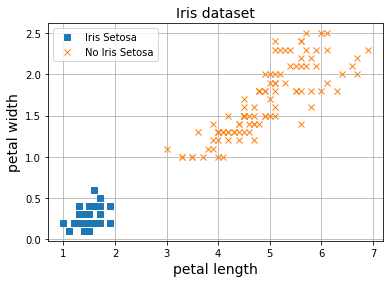

In [5]:
y = (iris.target == 0).astype(np.int)

plt.plot(X[y==1, 0], X[y==1, 1], 's', label="Iris Setosa")
plt.plot(X[y==0, 0], X[y==0, 1], 'x', label="No Iris Setosa")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

Así pues, nuestro objetivo será el de entrenar un Perceptrón que sea capaz de distinguir entre flores de tipo Iris Setosa y No Iris Setosa a partir del ancho y longitud de sus pétalos (clasificación binaria). Para ello utilizaremos exactamente el mismo algoritmo de entrenamiento que ya conocemos de posts anteriores: el algoritmo de descenso por gradiente.

Entrenando el Perceptrón
Utilizamos el algoritmo de descenso por gradiente para encontrar los pesos de nuestro perceptrón que nos permitan llevar a cabo nuestra tarea. Si no estás familiarizado con este algoritmo, te recomiendo que eches un vistazo a los posts anteriores en los que desarrollamos el algoritmo. A continuación puedes ver la implementación de un Perceptrón para llevar a cabo nuestra tarea.

In [6]:
class Perceptron():
  def __init__(self, size):
    self.w = np.random.randn(size) 
    self.ws = []
    
  def __call__(self, w, x):
    return np.dot(x, w) > 0 

  def fit(self, x, y, epochs, lr):
    x = np.c_[np.ones(len(x)), x]
    for epoch in range(epochs):
        # Batch Gradient Descent
        y_hat = self(self.w, x)  
        # función de pérdida (MSE)
        l = 0.5*(y_hat - y)**2
        # derivadas
        dldh = (y_hat - y)
        dhdw = x
        dldw = np.dot(dldh, dhdw)
        # actualizar pesos
        self.w = self.w - lr*dldw
        # guardar pesos para animación
        self.ws.append(self.w.copy())

In [7]:
np.random.seed(42)

perceptron = Perceptron(3)
epochs, lr = 10, 0.01
perceptron.fit(X, y, epochs, lr)

In [8]:
from matplotlib import animation, rc
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
rc('animation', html='html5')

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
def plot(i, axes = [0, 5, 0, 2], label="Iris Setosa"):
    ax.clear()
    w = perceptron.ws[i]
    tit = ax.set_title(f"Epoch {i+1}", fontsize=14)
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    X_new = np.c_[np.ones(len(X_new)), X_new] 
    y_predict = perceptron(w, X_new)
    zz = y_predict.reshape(x0.shape)
    ax.plot(X[y==0, 0], X[y==0, 1], "bs", label=f"No {label}")
    ax.plot(X[y==1, 0], X[y==1, 1], "yo", label=label)
    ax.contourf(x0, x1, zz, cmap=custom_cmap)
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    return ax

anim = animation.FuncAnimation(fig, plot, frames=epochs, interval=200)
plt.close()
anim

In [9]:
# últimos pesos encontrados

w = perceptron.ws[-1]
w

array([ 2.36671415, -0.8222643 , -0.31731146])

In [10]:
x_new = [1, 2, 0.5]
y_pred = perceptron(w, x_new)
y_pred # Iris Setosa

True

In [11]:
x_new = [1, 4, 0.5]
y_pred = perceptron(w, x_new)
y_pred # No Iris Setosa

False

In [12]:
# Normalizamos entre 0 y 1

print(X.max(axis=0), X.min(axis=0))

X_norm = (X - X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

print(X_norm.max(axis=0), X_norm.min(axis=0))

[6.9 2.5] [1.  0.1]
[1. 1.] [0. 0.]


In [15]:
x.size

1000

In [16]:
x.shape

(1000,)

In [17]:
X_norm.size

300

In [19]:
X_norm.shape

(150, 2)

In [20]:
# Normalizamos con valor medio 0 y desviación estándar 1

print(X.mean(axis=0), X.std(axis=0))

X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X_norm = (X - X_mean) / X_std

print(X_norm.mean(axis=0), X_norm.std(axis=0))

[3.758      1.19933333] [1.75940407 0.75969263]
[-4.26325641e-16 -4.73695157e-16] [1. 1.]


In [21]:
np.random.seed(42)

perceptron = Perceptron(3)
epochs, lr = 20, 0.1
perceptron.fit(X_norm, y, epochs, lr)

In [22]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
def plot(i, axes = [0, 5, 0, 2], label="Iris Setosa"):
    ax.clear()
    w = perceptron.ws[i]
    tit = ax.set_title(f"Epoch {i+1}", fontsize=14)
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = (np.c_[x0.ravel(), x1.ravel()] - X_mean)/X_std
    X_new = np.c_[np.ones(len(X_new)), X_new] 
    y_predict = perceptron(w, X_new)
    zz = y_predict.reshape(x0.shape)
    ax.plot(X[y==0, 0], X[y==0, 1], "bs", label=f"No {label}")
    ax.plot(X[y==1, 0], X[y==1, 1], "yo", label=label)
    ax.contourf(x0, x1, zz, cmap=custom_cmap)
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    return ax

anim = animation.FuncAnimation(fig, plot, frames=epochs, interval=200)
plt.close()
anim